# House Price Prediction - Advanced Regression

## Project team's ID : PTID-CDS-DEC-24-2242

## Project Code- PRCP-1020-HousePricePred

In [1]:
# load libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Filter out all warnings
import warnings 
warnings.filterwarnings('ignore')

In [3]:
# load dataset
data=pd.read_csv('data.csv')

In [4]:
# Display Maximum rows and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Basic checks

In [5]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
data.duplicated().sum()

0

In [8]:
# Display summary statistics of the DataFrame
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
# Display summary statistics of the categorical (object) columns in the DataFrame
data.describe(include='O')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,588,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,3,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,445,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


In [10]:
# Calculate the percentage of missing values in each column
data.isnull().sum()/len(data)*100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType       59.726027
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

In [11]:
data.drop(['Id','Alley','MasVnrType','FireplaceQu','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [12]:
data.shape

(1460, 74)

# EDA

<Axes: xlabel='LotArea', ylabel='SalePrice'>

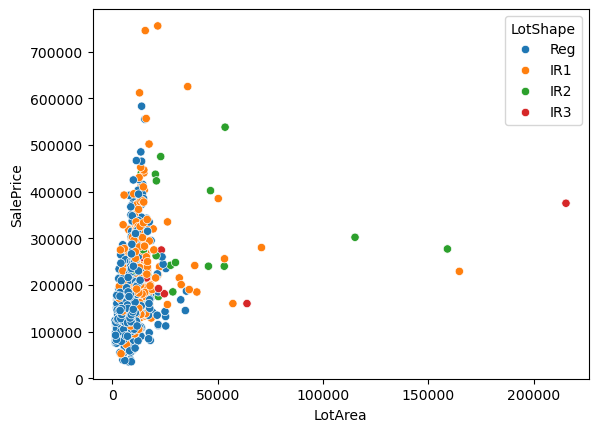

In [14]:
sns.scatterplot(x='LotArea',y='SalePrice',hue='LotShape',data=data)

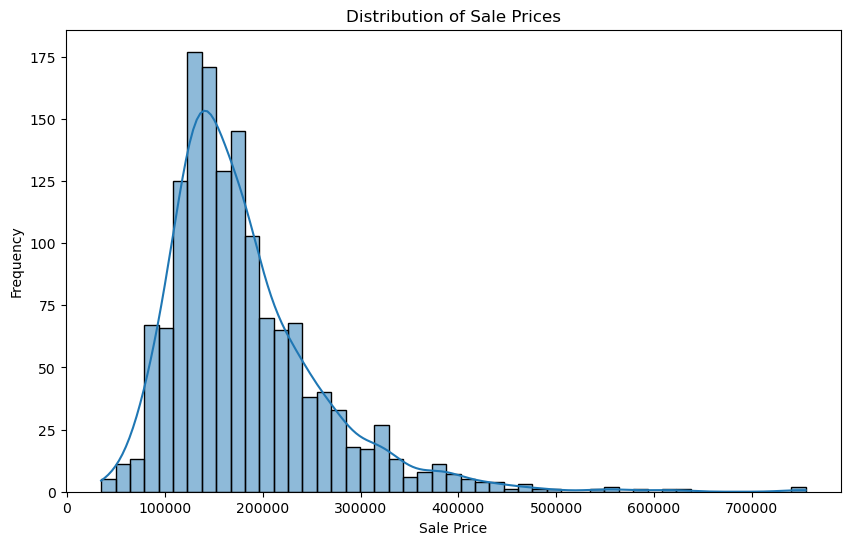

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(data['SalePrice'], kde=True)
plt.title('Distribution of Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

In [16]:
# Numerical columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
# Categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns

In [17]:
numerical_cols.shape

(37,)

In [18]:
categorical_cols.shape

(37,)

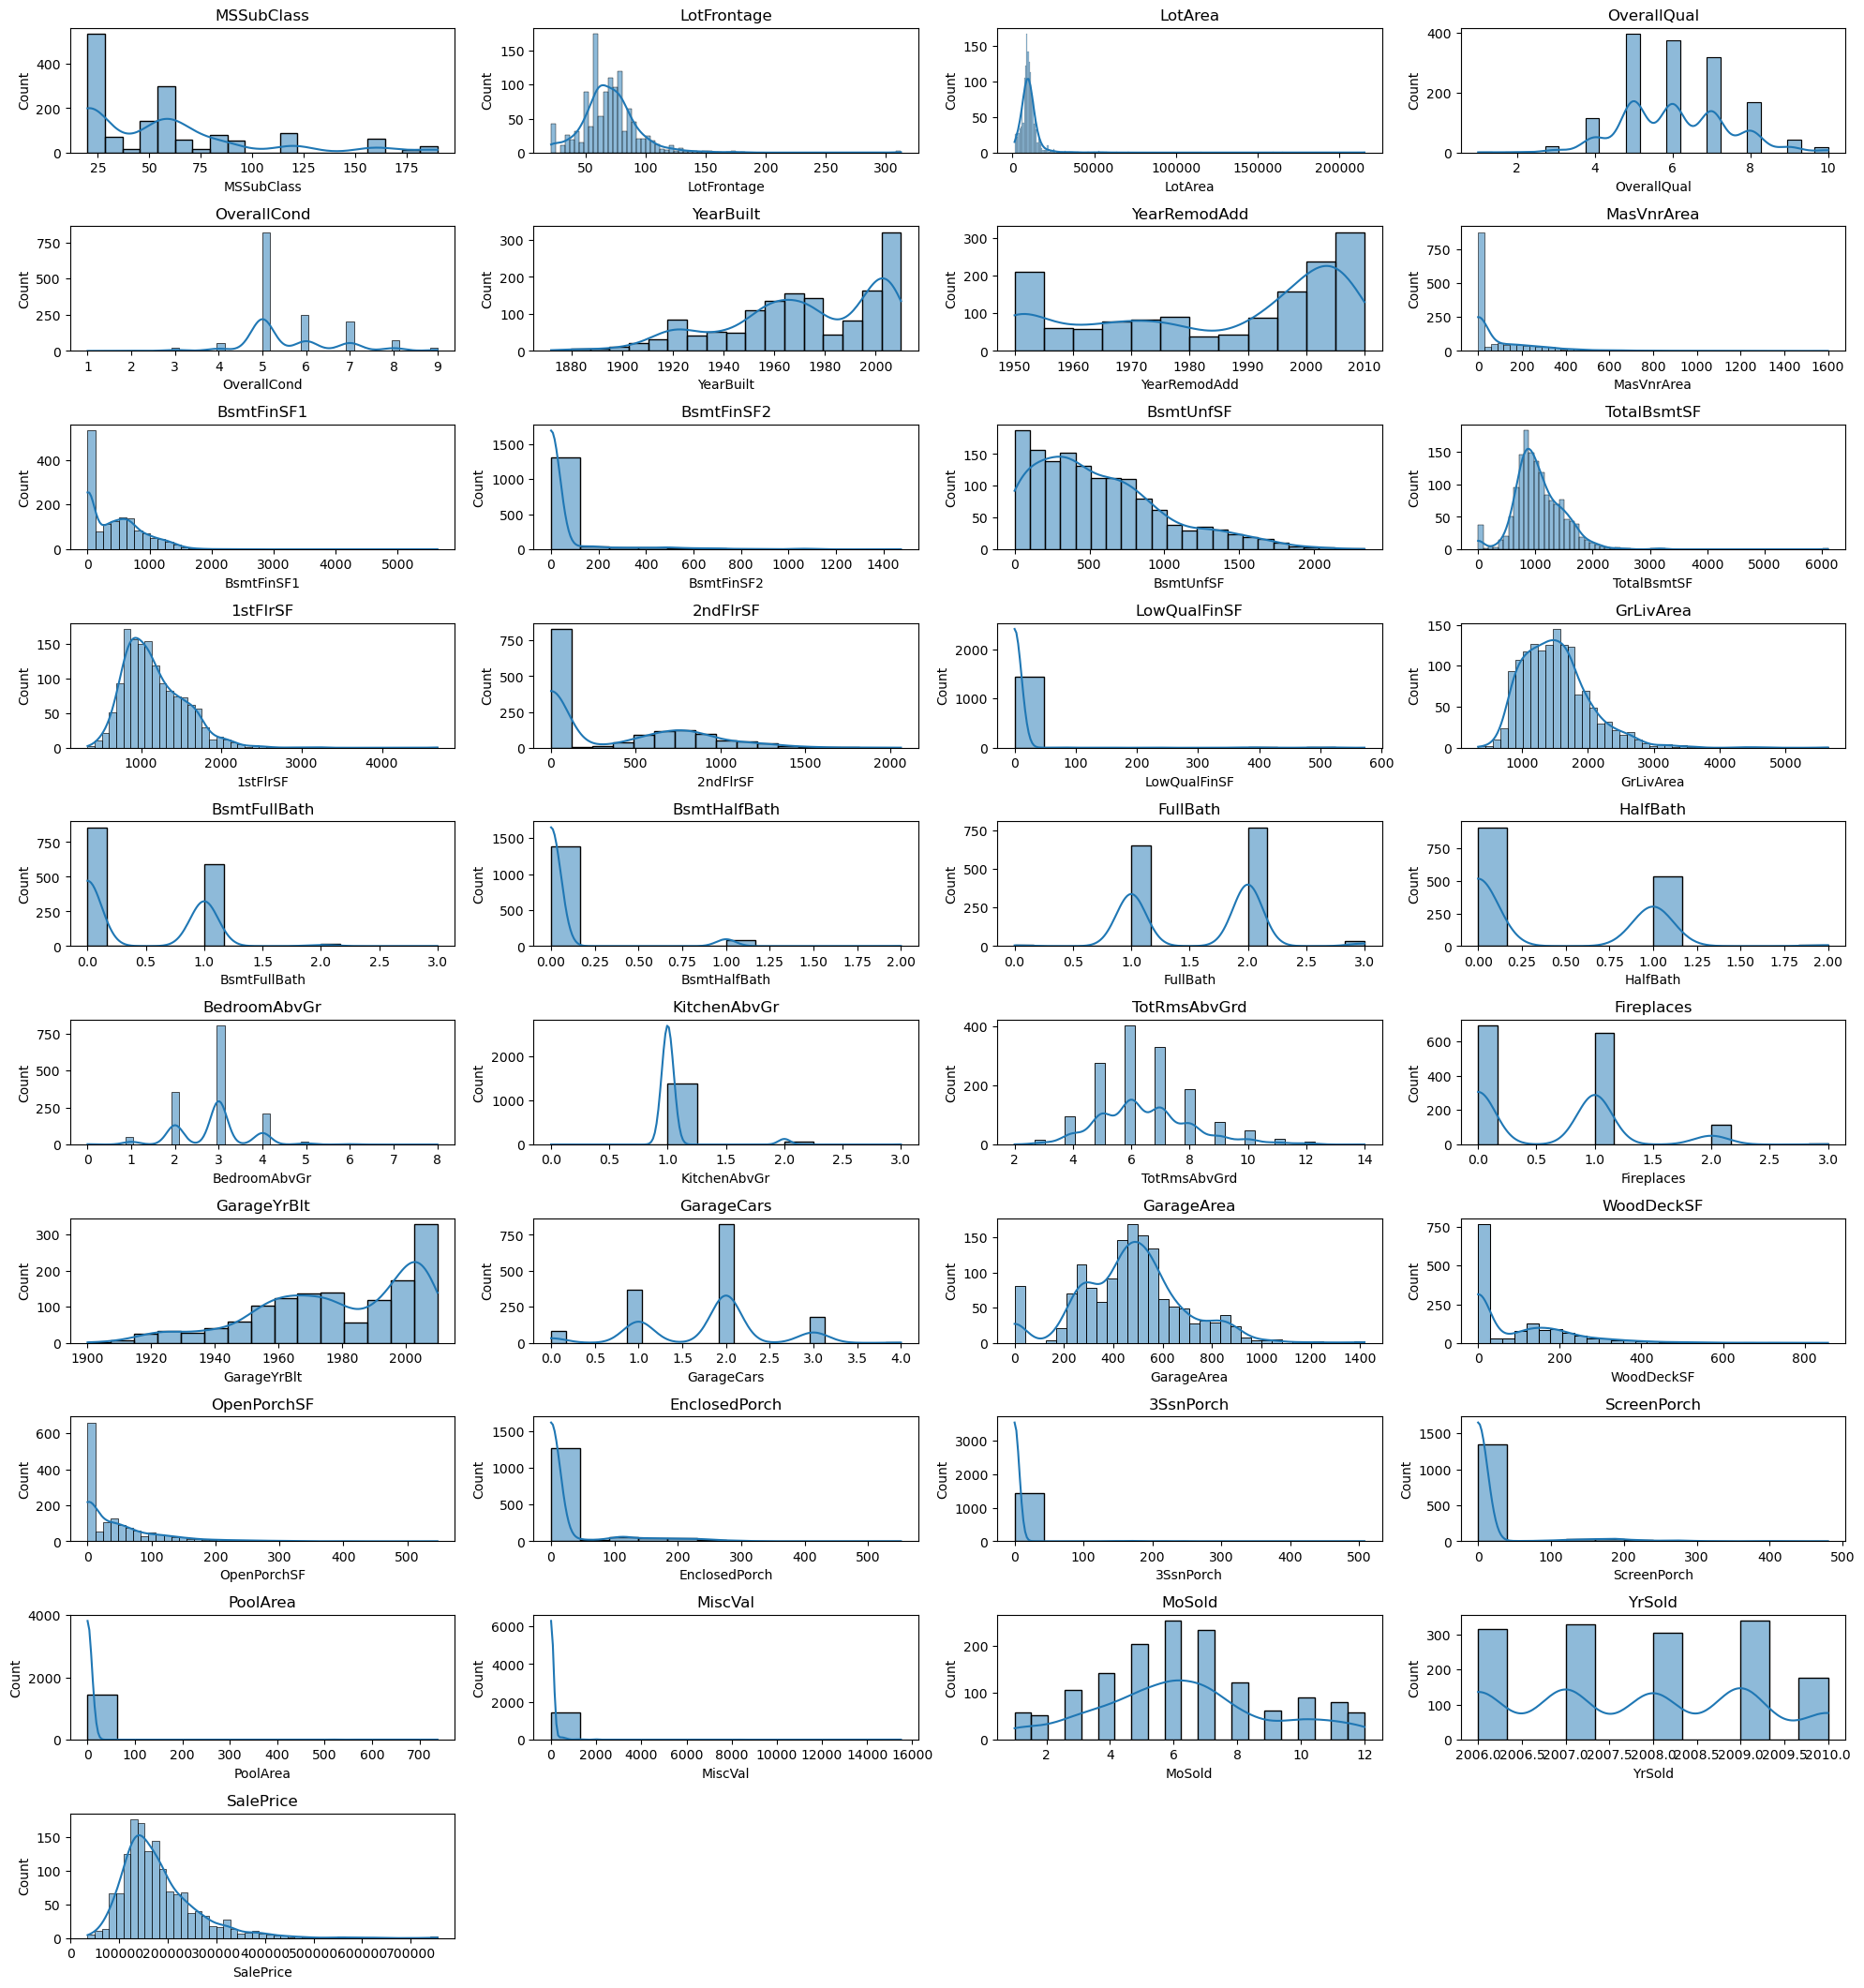

In [19]:
# histplot for numerical values using subplot
plt.figure(figsize=(20,23),facecolor='white')
plotnum=1
for i in numerical_cols:
    plt.subplot(11,4,plotnum)
    sns.histplot(x=data[i],kde=True)
    plt.title(i)
    plotnum+=1
plt.tight_layout()
plt.show()

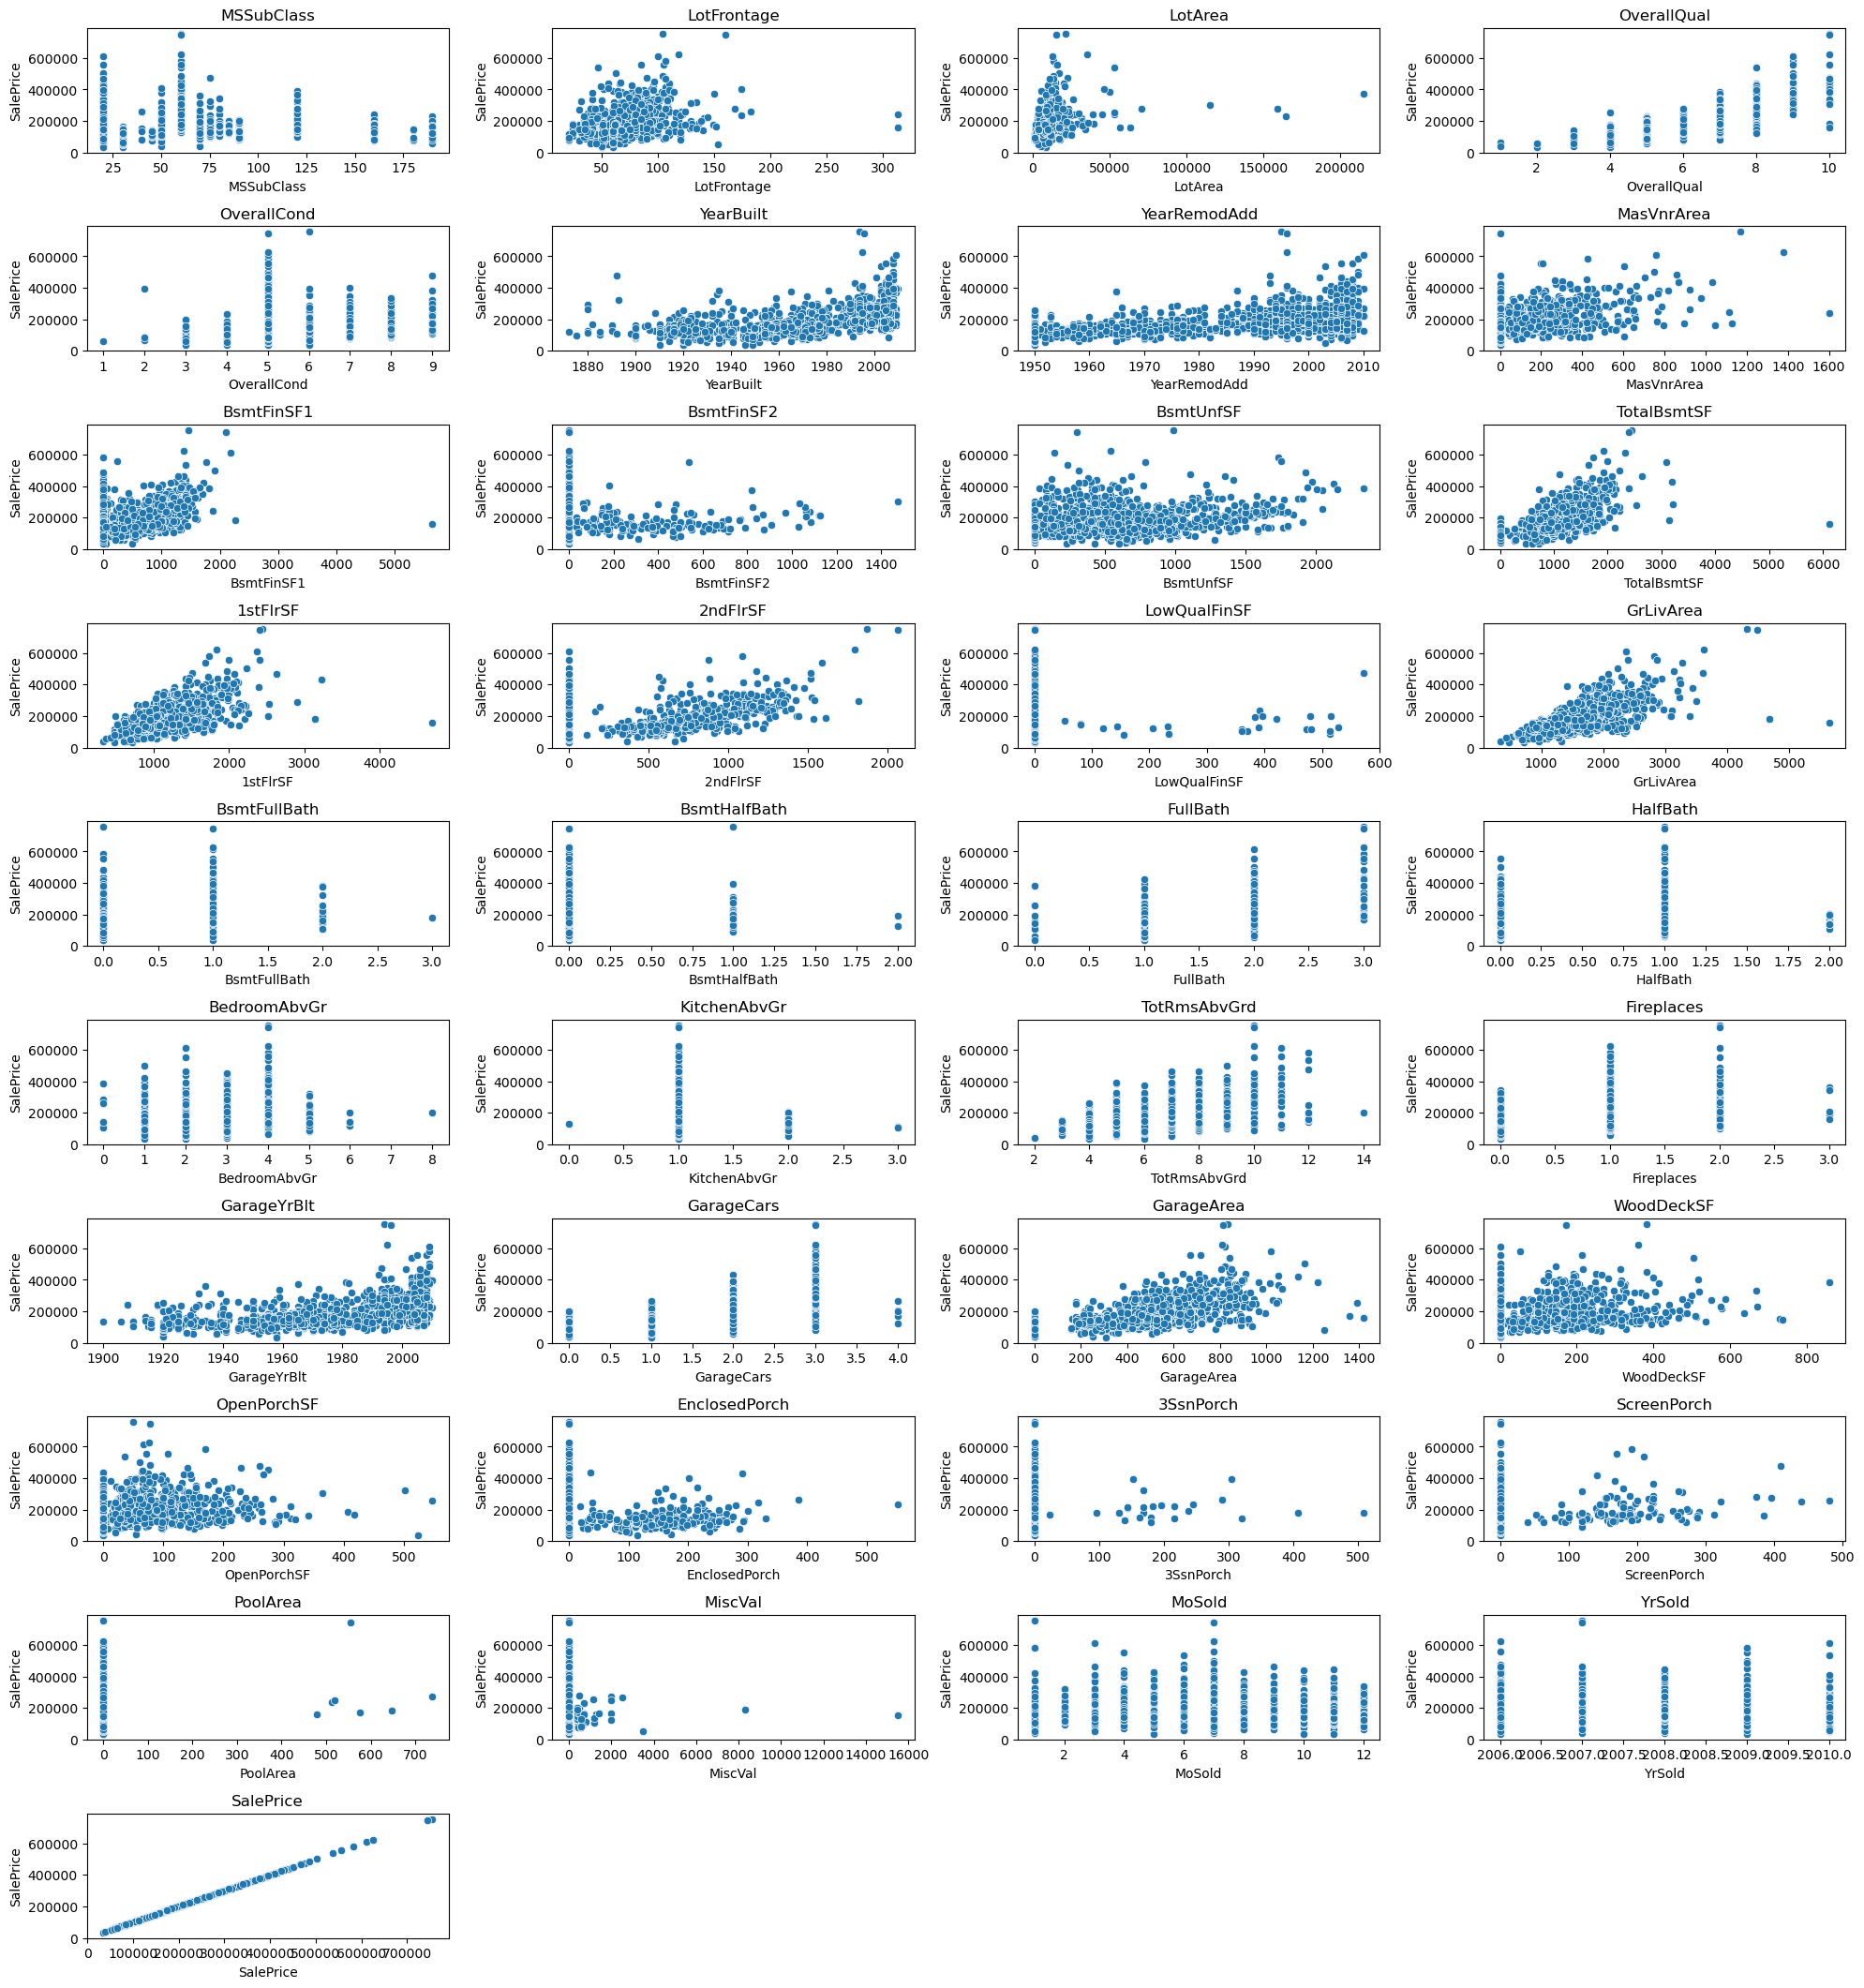

In [20]:
#scatter plot for numerical columns
plt.figure(figsize=(20,23),facecolor='white')
plotnum=1
for i in numerical_cols:
    plt.subplot(11,4,plotnum)
    sns.scatterplot(x=data[i],y=data['SalePrice'])
    plt.title(i)
    plotnum+=1
plt.tight_layout()
plt.show()

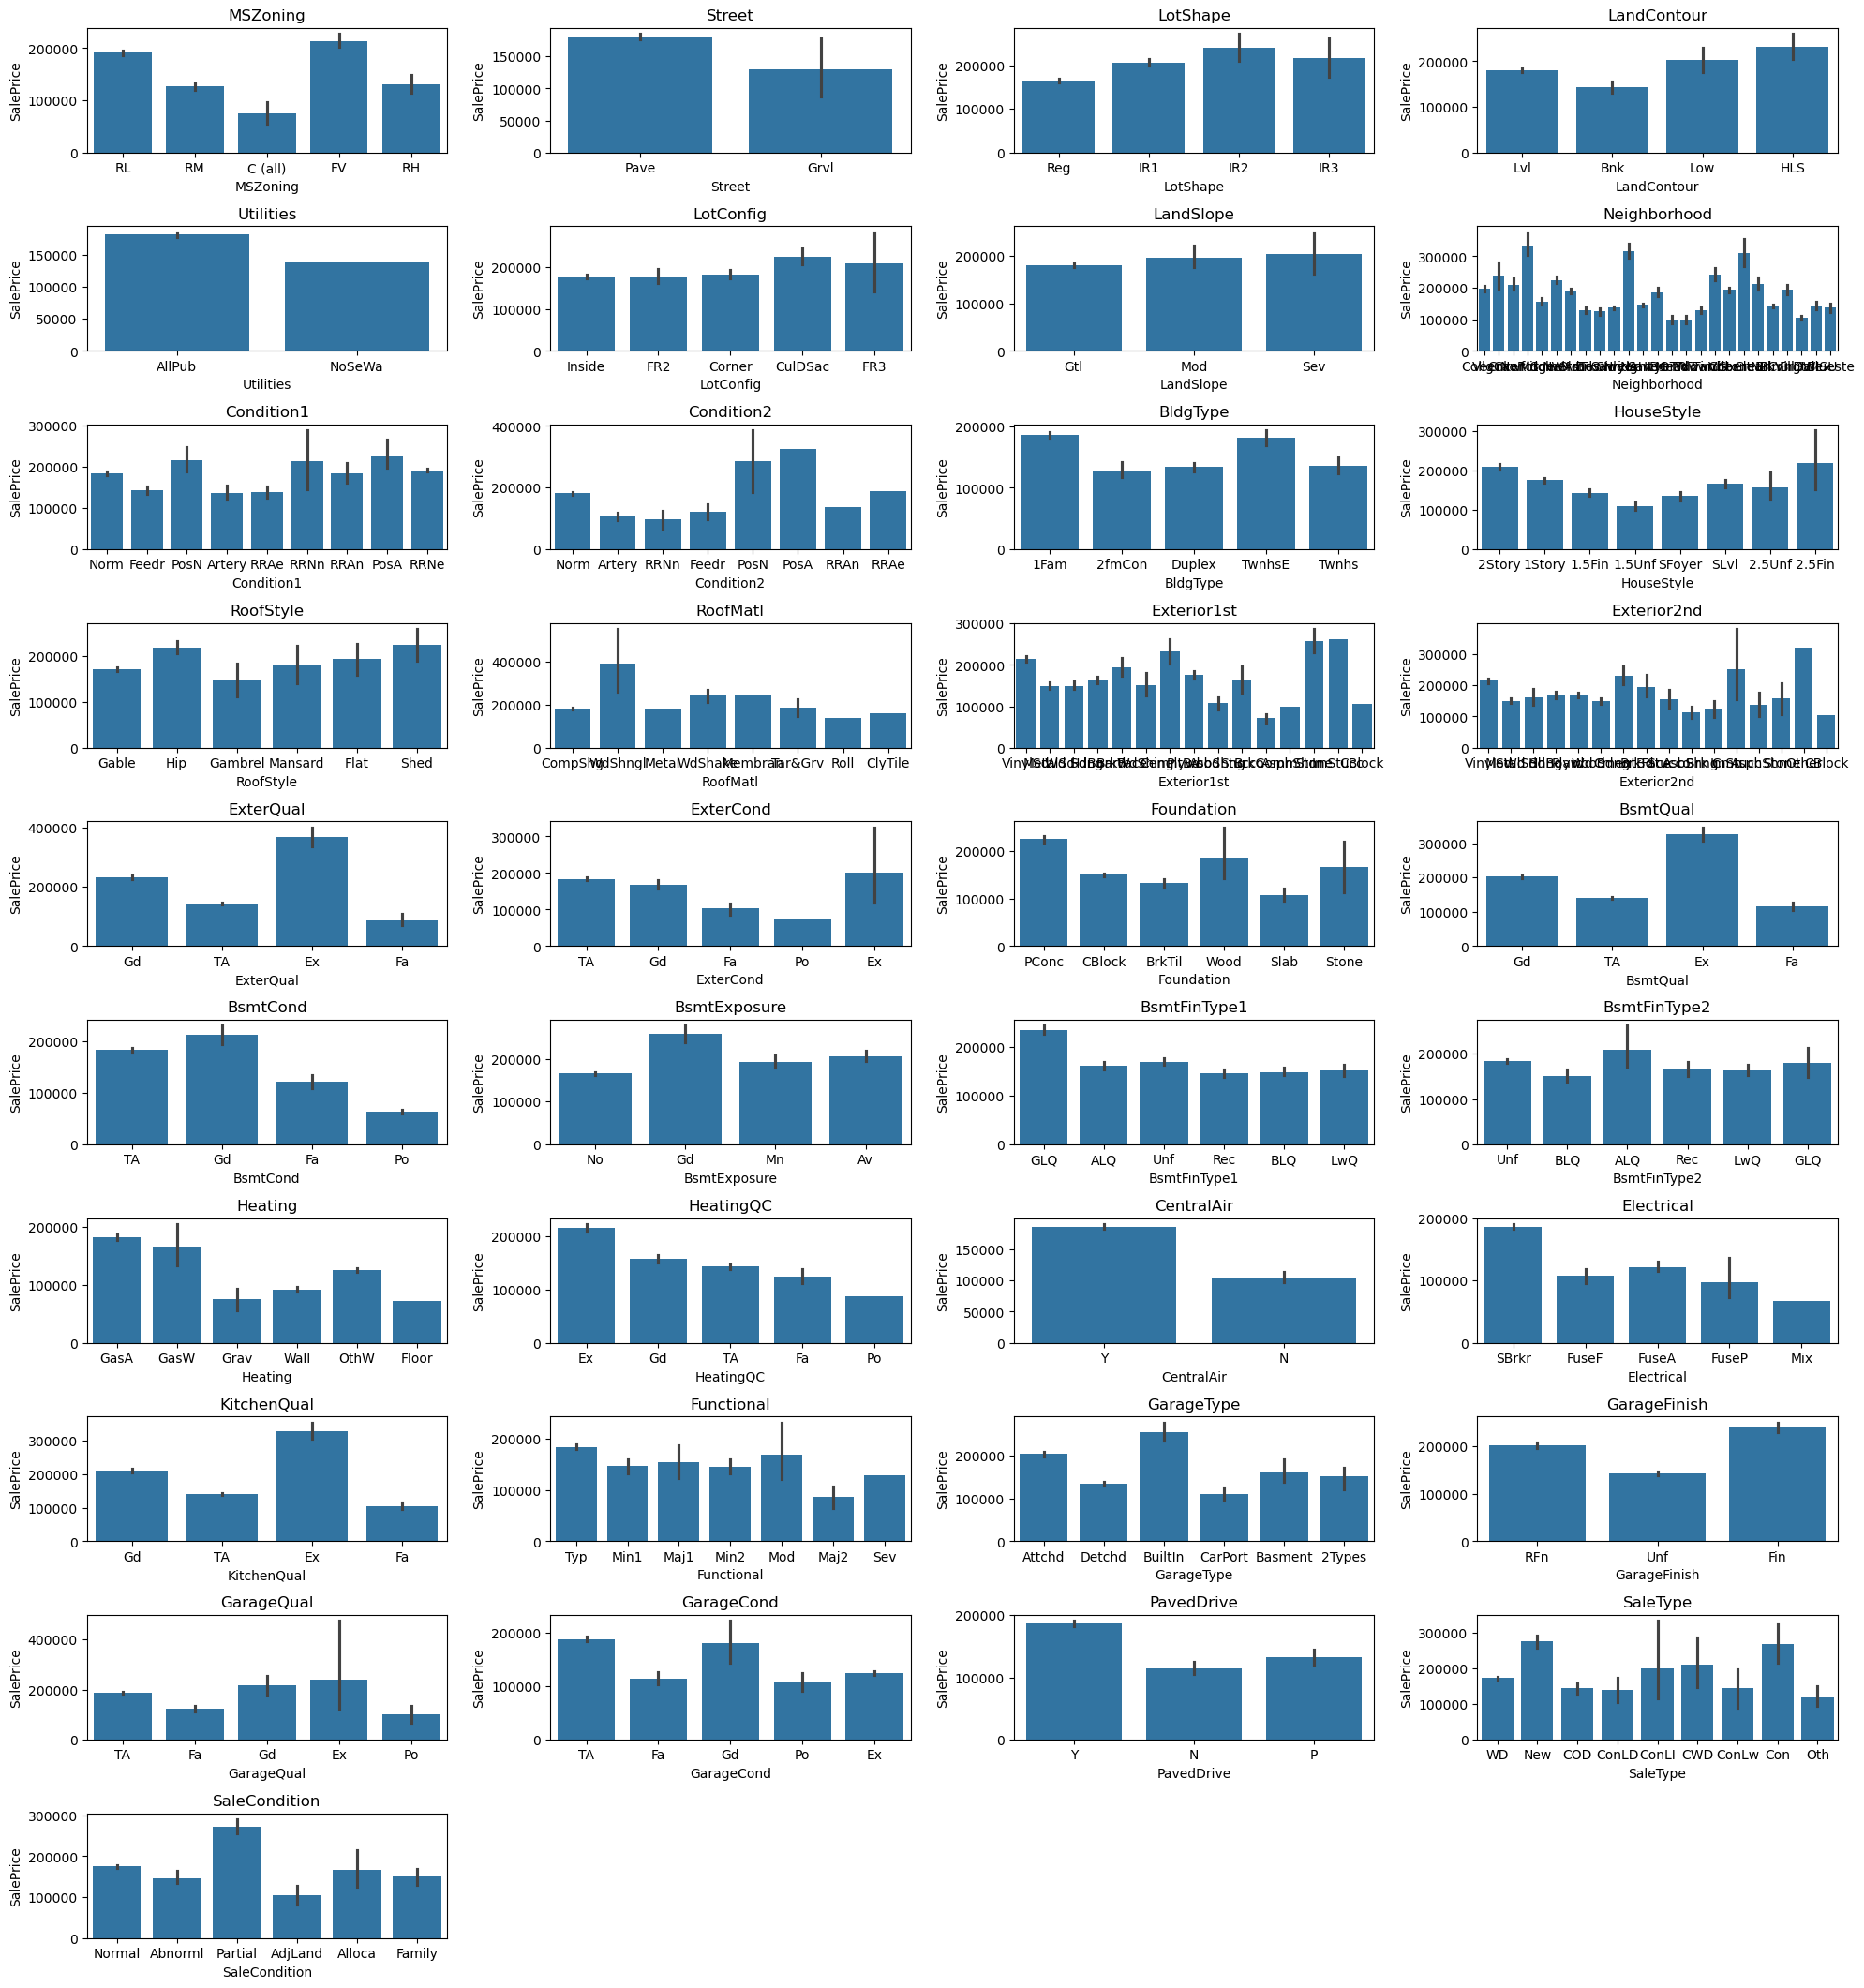

In [21]:
# barplot for categorical columns
plt.figure(figsize=(20,23),facecolor='white')
plotnum=1
for i in categorical_cols:
    plt.subplot(11,4,plotnum)
    sns.barplot(x=data[i],y=data['SalePrice'])
    plt.title(i)
    plotnum+=1
plt.tight_layout()
plt.show()

# Data Preprocessing

### NULL VALUES

In [22]:
data.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinSF1         0
BsmtFinType2      38
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath     

In [23]:
#Fillna for handling null values
data.fillna({
    'LotFrontage':data['LotFrontage'].median(),
    'BsmtQual':data['BsmtQual'].mode()[0],
    'BsmtCond':data['BsmtCond'].mode()[0],
    'BsmtExposure':data['BsmtExposure'].mode()[0],
    'BsmtFinType1':data['BsmtFinType1'].mode()[0],
    'BsmtFinType2':data['BsmtFinType2'].mode()[0],
    'Electrical':data['Electrical'].mode()[0],
    'GarageType':data['GarageType'].mode()[0],
    'GarageYrBlt':data['GarageYrBlt'].median(),
    'GarageFinish':data['GarageFinish'].mode()[0],
    'GarageQual':data['GarageQual'].mode()[0],
    'GarageCond':data['GarageCond'].mode()[0],
    'MasVnrArea':data['MasVnrArea'].median()
},inplace=True)

In [24]:
data.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional  

### OUTLIERS

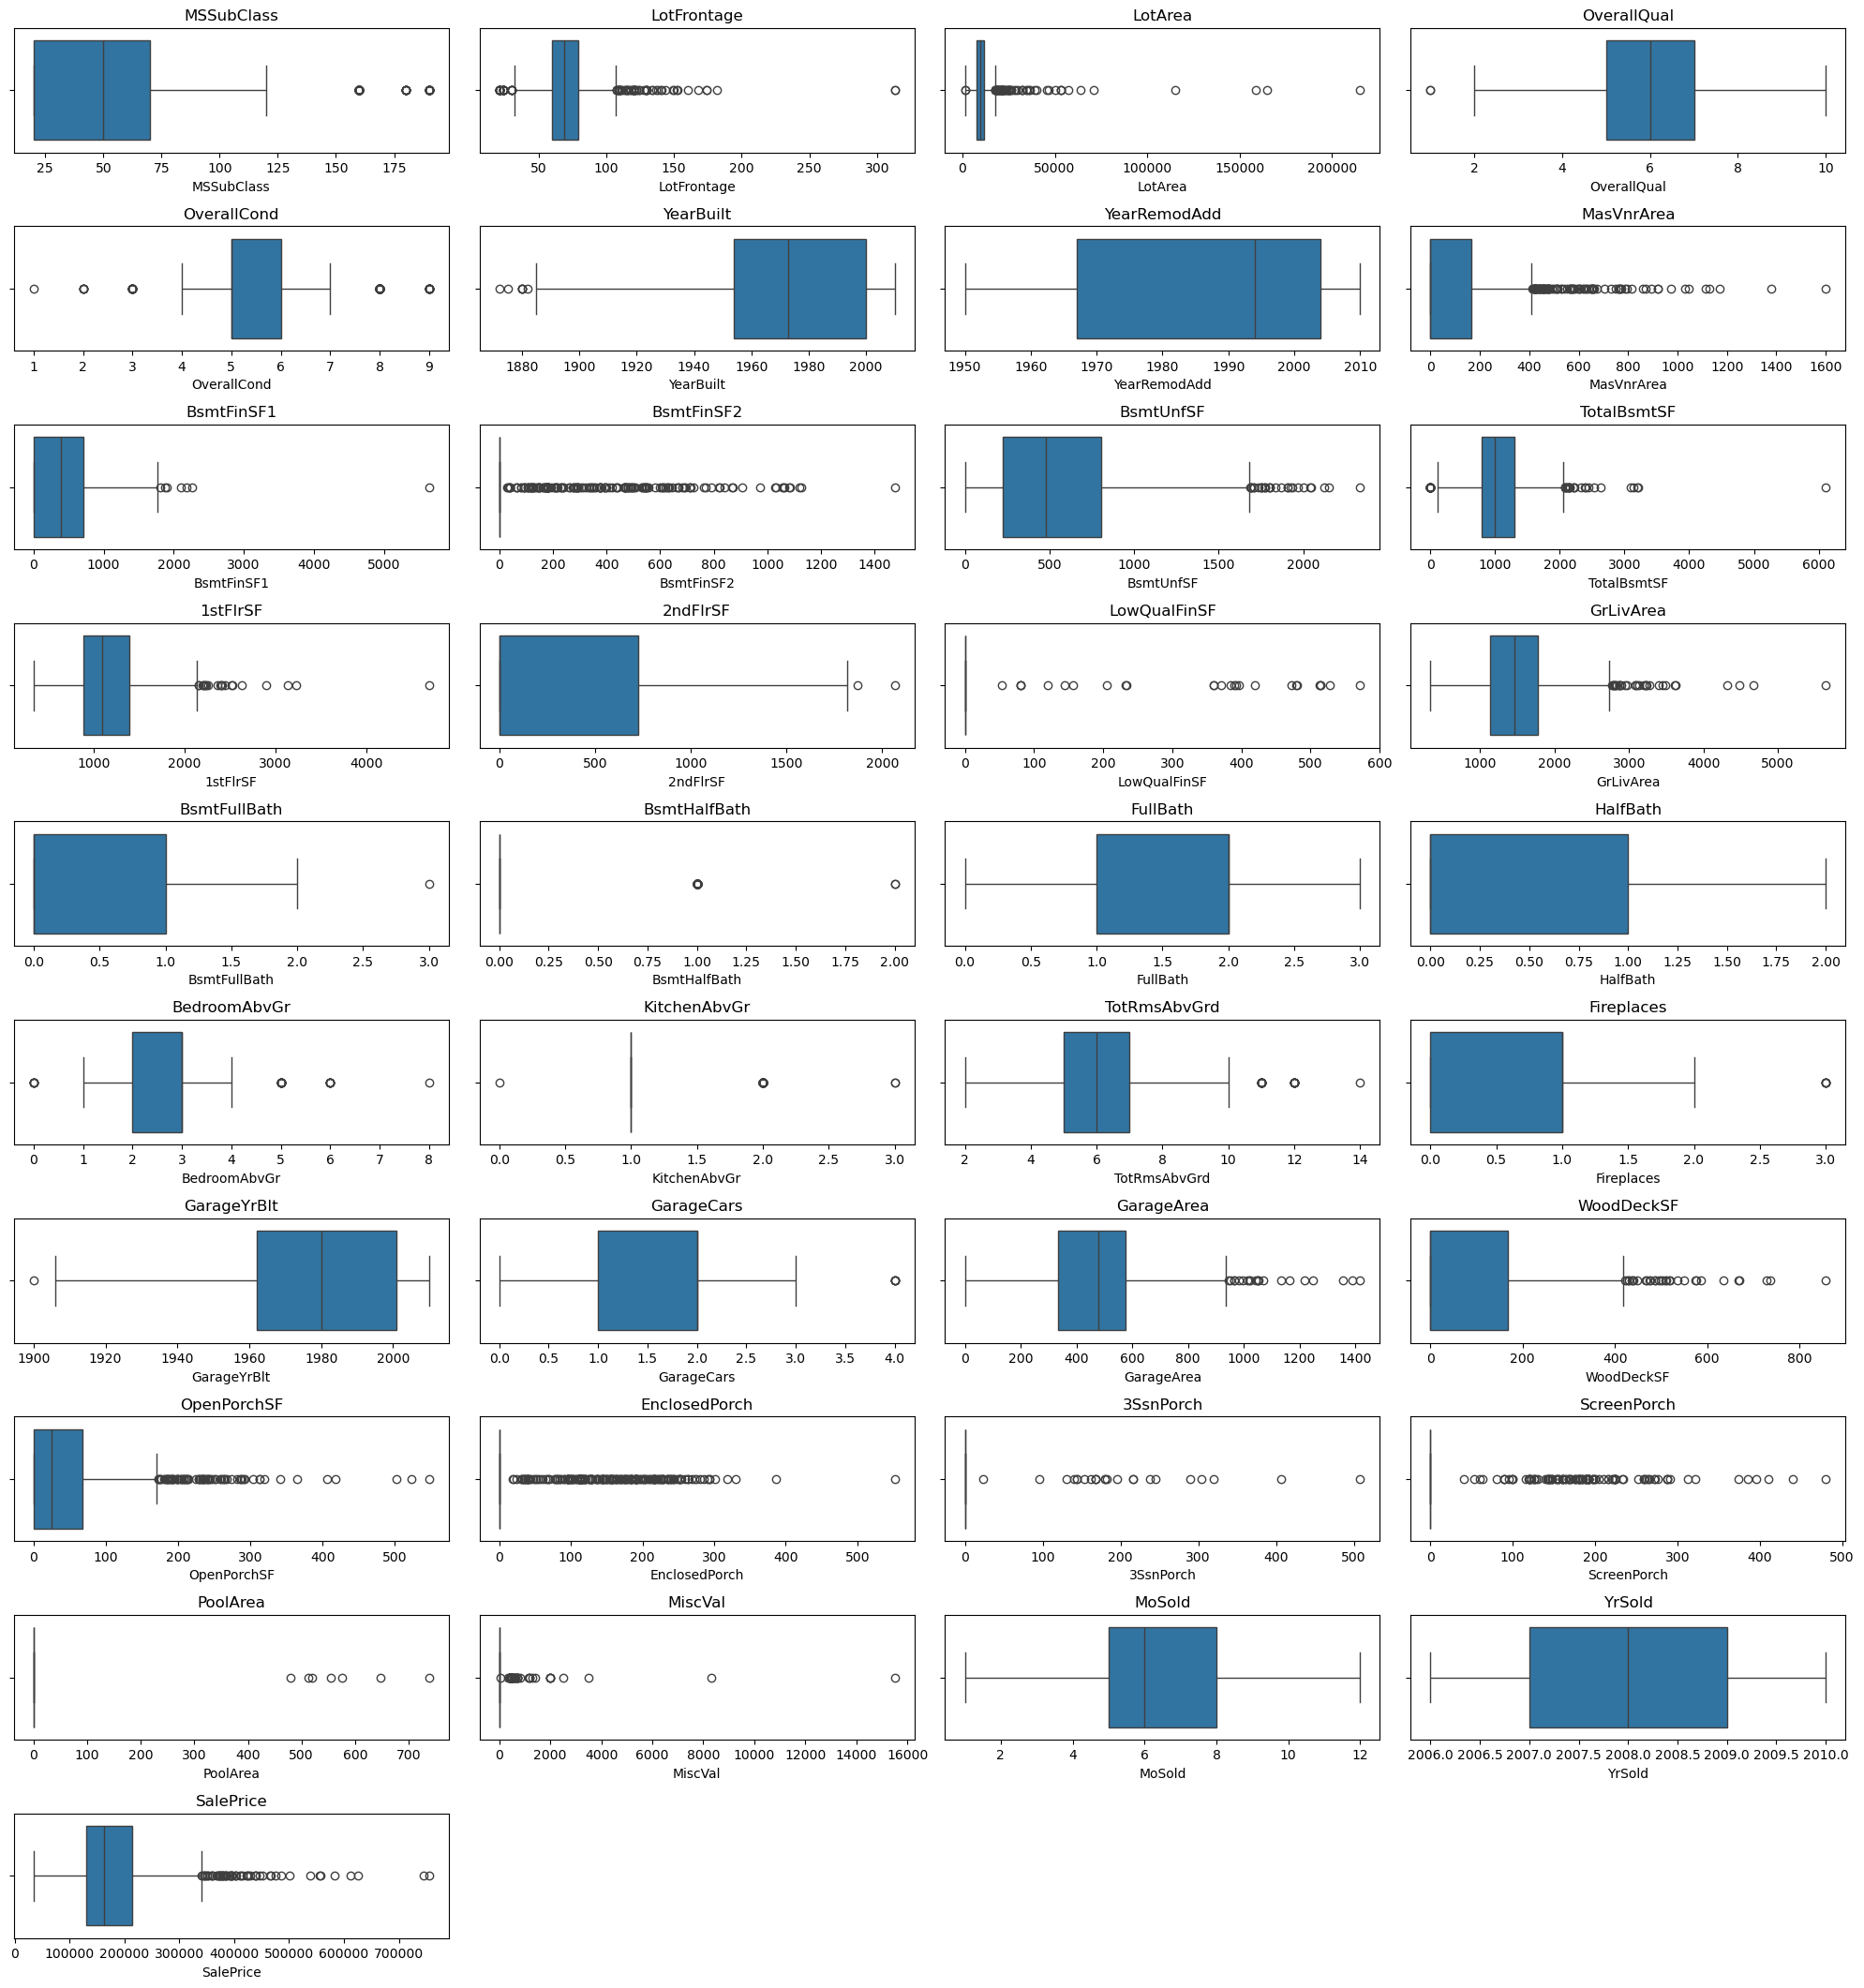

In [25]:
# box plot for numerical columns to display outliers
plt.figure(figsize=(20,23),facecolor='white')
plotnum=1
for i in numerical_cols:
    plt.subplot(11,4,plotnum)
    sns.boxplot(x=data[i])
    plt.title(i)
    plotnum+=1
plt.tight_layout()
plt.show()

In [26]:
data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPor

In [27]:
data.LowQualFinSF.value_counts()

LowQualFinSF
0      1434
80        3
360       2
205       1
479       1
397       1
514       1
120       1
481       1
232       1
53        1
515       1
156       1
473       1
420       1
390       1
371       1
392       1
144       1
572       1
528       1
234       1
513       1
384       1
Name: count, dtype: int64

In [28]:
data.BsmtFullBath.value_counts()

BsmtFullBath
0    856
1    588
2     15
3      1
Name: count, dtype: int64

In [29]:
# Using loc and replacing outliers with their median for columns with outliers
data.loc[data['MSSubClass']>125,'MSSubClass']=np.median(data['MSSubClass'])
data.loc[data['LotFrontage']>160,'LotFrontage']=np.median(data['LotFrontage'])
data.loc[data['LotArea']>50000,'LotArea']=np.median(data['LotArea'])
data.loc[data['OverallQual']>12,'OverallQual']=np.median(data['OverallQual'])
data.loc[data['OverallCond']>12,'OverallCond']=np.median(data['OverallCond'])
data.loc[data['YearBuilt']<1750,'YearBuilt']=np.median(data['YearBuilt'])
data.loc[data['YearRemodAdd']<1750,'YearRemodAdd']=np.median(data['YearRemodAdd'])
data.loc[data['MasVnrArea']>900,'MasVnrArea']=np.median(data['MasVnrArea'])
data.loc[data['BsmtFinSF1']>2000,'BsmtFinSF1']=np.median(data['BsmtFinSF1'])
data.loc[data['BsmtFinSF2']>770,'BsmtFinSF2']=np.median(data['BsmtFinSF2'])
data.loc[data['BsmtUnfSF']>1950,'BsmtUnfSF']=np.median(data['BsmtUnfSF'])
data.loc[data['TotalBsmtSF']>2700,'TotalBsmtSF']=np.median(data['TotalBsmtSF'])
data.loc[data['1stFlrSF']>2600,'1stFlrSF']=np.median(data['1stFlrSF'])
data.loc[data['2ndFlrSF']>1700,'2ndFlrSF']=np.median(data['2ndFlrSF'])
data.loc[data['GrLivArea']>3700,'GrLivArea']=np.median(data['GrLivArea'])
data.loc[data['LowQualFinSF']>360,'LowQualFinSF']=np.median(data['LowQualFinSF'])
data.loc[data['BsmtFullBath']>2,'BsmtFullBath']=np.median(data['BsmtFullBath'])
data.loc[data['BsmtHalfBath']>1,'BsmtHalfBath']=np.median(data['BsmtHalfBath'])
data.loc[(data['BedroomAbvGr']>4.5)|(data['BedroomAbvGr']<1),'BedroomAbvGr']=np.median(data['BedroomAbvGr'])
data.loc[(data['KitchenAbvGr']>1.5)|(data['BedroomAbvGr']<0.5),'KitchenAbvGr']=np.median(data['KitchenAbvGr'])
data.loc[data['TotRmsAbvGrd']>10,'TotRmsAbvGrd']=np.median(data['TotRmsAbvGrd'])
data.loc[data['Fireplaces']>2,'Fireplaces']=np.median(data['Fireplaces'])
data.loc[data['GarageYrBlt']<1905]=np.median(data['GarageYrBlt'])
data.loc[data['GarageCars']>3,'GarageCars']=np.median(data['GarageCars'])
data.loc[data['GarageArea']>1100,'GarageArea']=np.median(data['GarageArea'])
data.loc[data['WoodDeckSF']>600,'WoodDeckSF']=np.median(data['WoodDeckSF'])
data.loc[data['OpenPorchSF']>310,'OpenPorchSF']=np.median(data['OpenPorchSF'])
data.loc[data['EnclosedPorch']>310,'EnclosedPorch']=np.median(data['EnclosedPorch'])
data.loc[data['3SsnPorch']>200,'3SsnPorch']=np.median(data['3SsnPorch'])
data.loc[data['ScreenPorch']>300,'ScreenPorch']=np.median(data['ScreenPorch'])
data.loc[data['PoolArea']>400,'PoolArea']=np.median(data['PoolArea'])
data.loc[data['MiscVal']>2000,'MiscVal']=np.median(data['MiscVal'])                                         

In [30]:
# Select numerical columns as a DataFrame
numerical_df = data[numerical_cols]

# Calculate correlation with the target column
correlation_with_target = numerical_df.corr()['SalePrice'].sort_values(ascending=False)

# Display the result
print(correlation_with_target)

SalePrice        1.000000
GrLivArea        0.692248
GarageCars       0.647559
TotalBsmtSF      0.630317
GarageArea       0.624757
1stFlrSF         0.613733
YearBuilt        0.521510
YearRemodAdd     0.506963
GarageYrBlt      0.466304
MasVnrArea       0.386489
LotArea          0.373836
BsmtFinSF1       0.371690
OpenPorchSF      0.347248
WoodDeckSF       0.323004
2ndFlrSF         0.252807
BsmtUnfSF        0.170627
ScreenPorch      0.081363
LotFrontage      0.073206
3SsnPorch        0.032267
YrSold           0.002755
MSSubClass      -0.022027
OverallQual     -0.037711
TotRmsAbvGrd    -0.045243
MiscVal         -0.051841
FullBath        -0.052903
Fireplaces      -0.053175
BedroomAbvGr    -0.055967
HalfBath        -0.056112
MoSold          -0.056325
BsmtFullBath    -0.056593
KitchenAbvGr    -0.058856
BsmtHalfBath    -0.058921
OverallCond     -0.060522
LowQualFinSF    -0.076771
BsmtFinSF2      -0.088380
EnclosedPorch   -0.146165
PoolArea              NaN
Name: SalePrice, dtype: float64


In [31]:
data.drop(['OverallQual','OverallCond','LotFrontage','LowQualFinSF','MSSubClass','3SsnPorch'],axis=1,inplace=True)

In [32]:
data1=numerical_df.drop('SalePrice',axis=1)
corr_matrix = data1.corr()

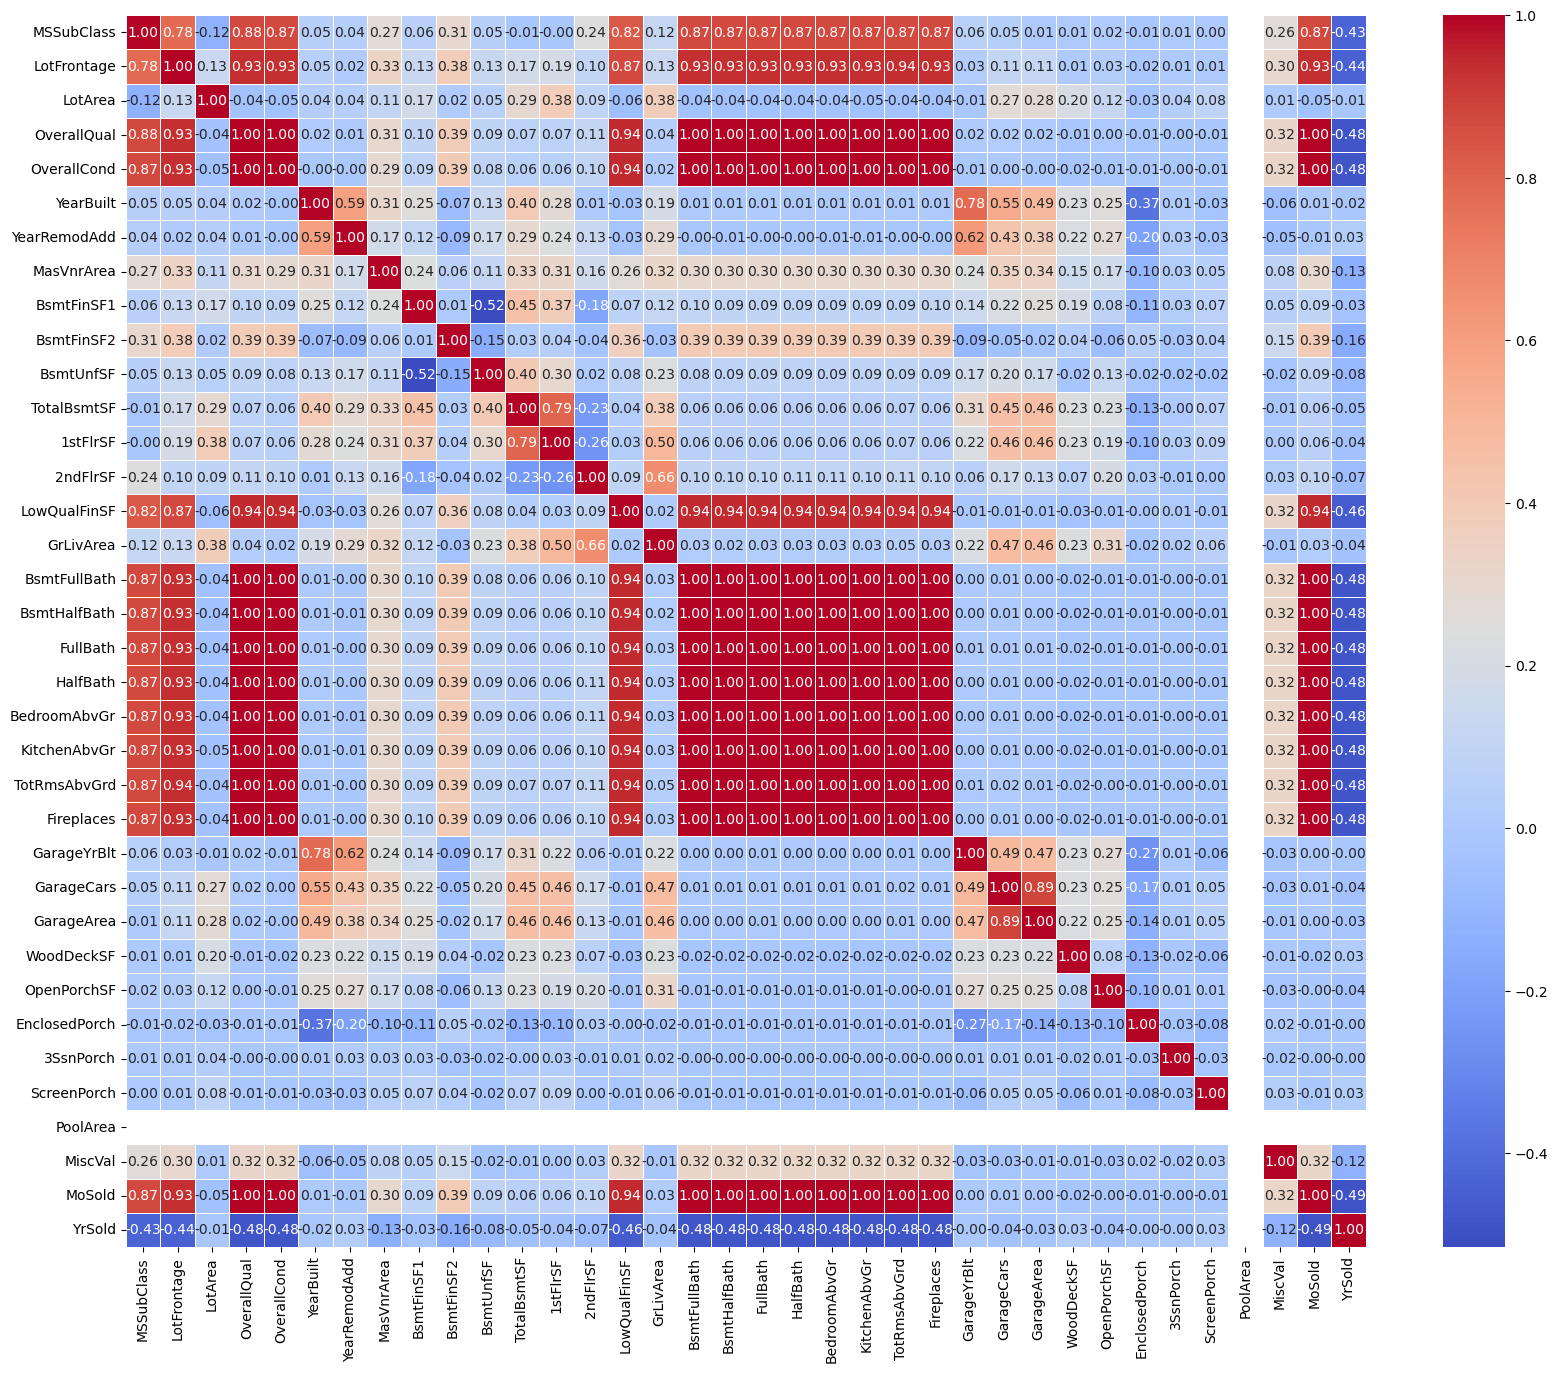

In [33]:
# heatmap to see correlation
plt.figure(figsize=(20,16))
sns.heatmap(corr_matrix,
            cmap='coolwarm',
            annot=True,
            fmt='.2f',
            cbar=True,
            linewidths=0.5
           )
plt.show()

### Encoding

In [34]:
data.Neighborhood.value_counts()

Neighborhood
NAmes      225
CollgCr    150
OldTown    112
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
1980.0       1
Name: count, dtype: int64

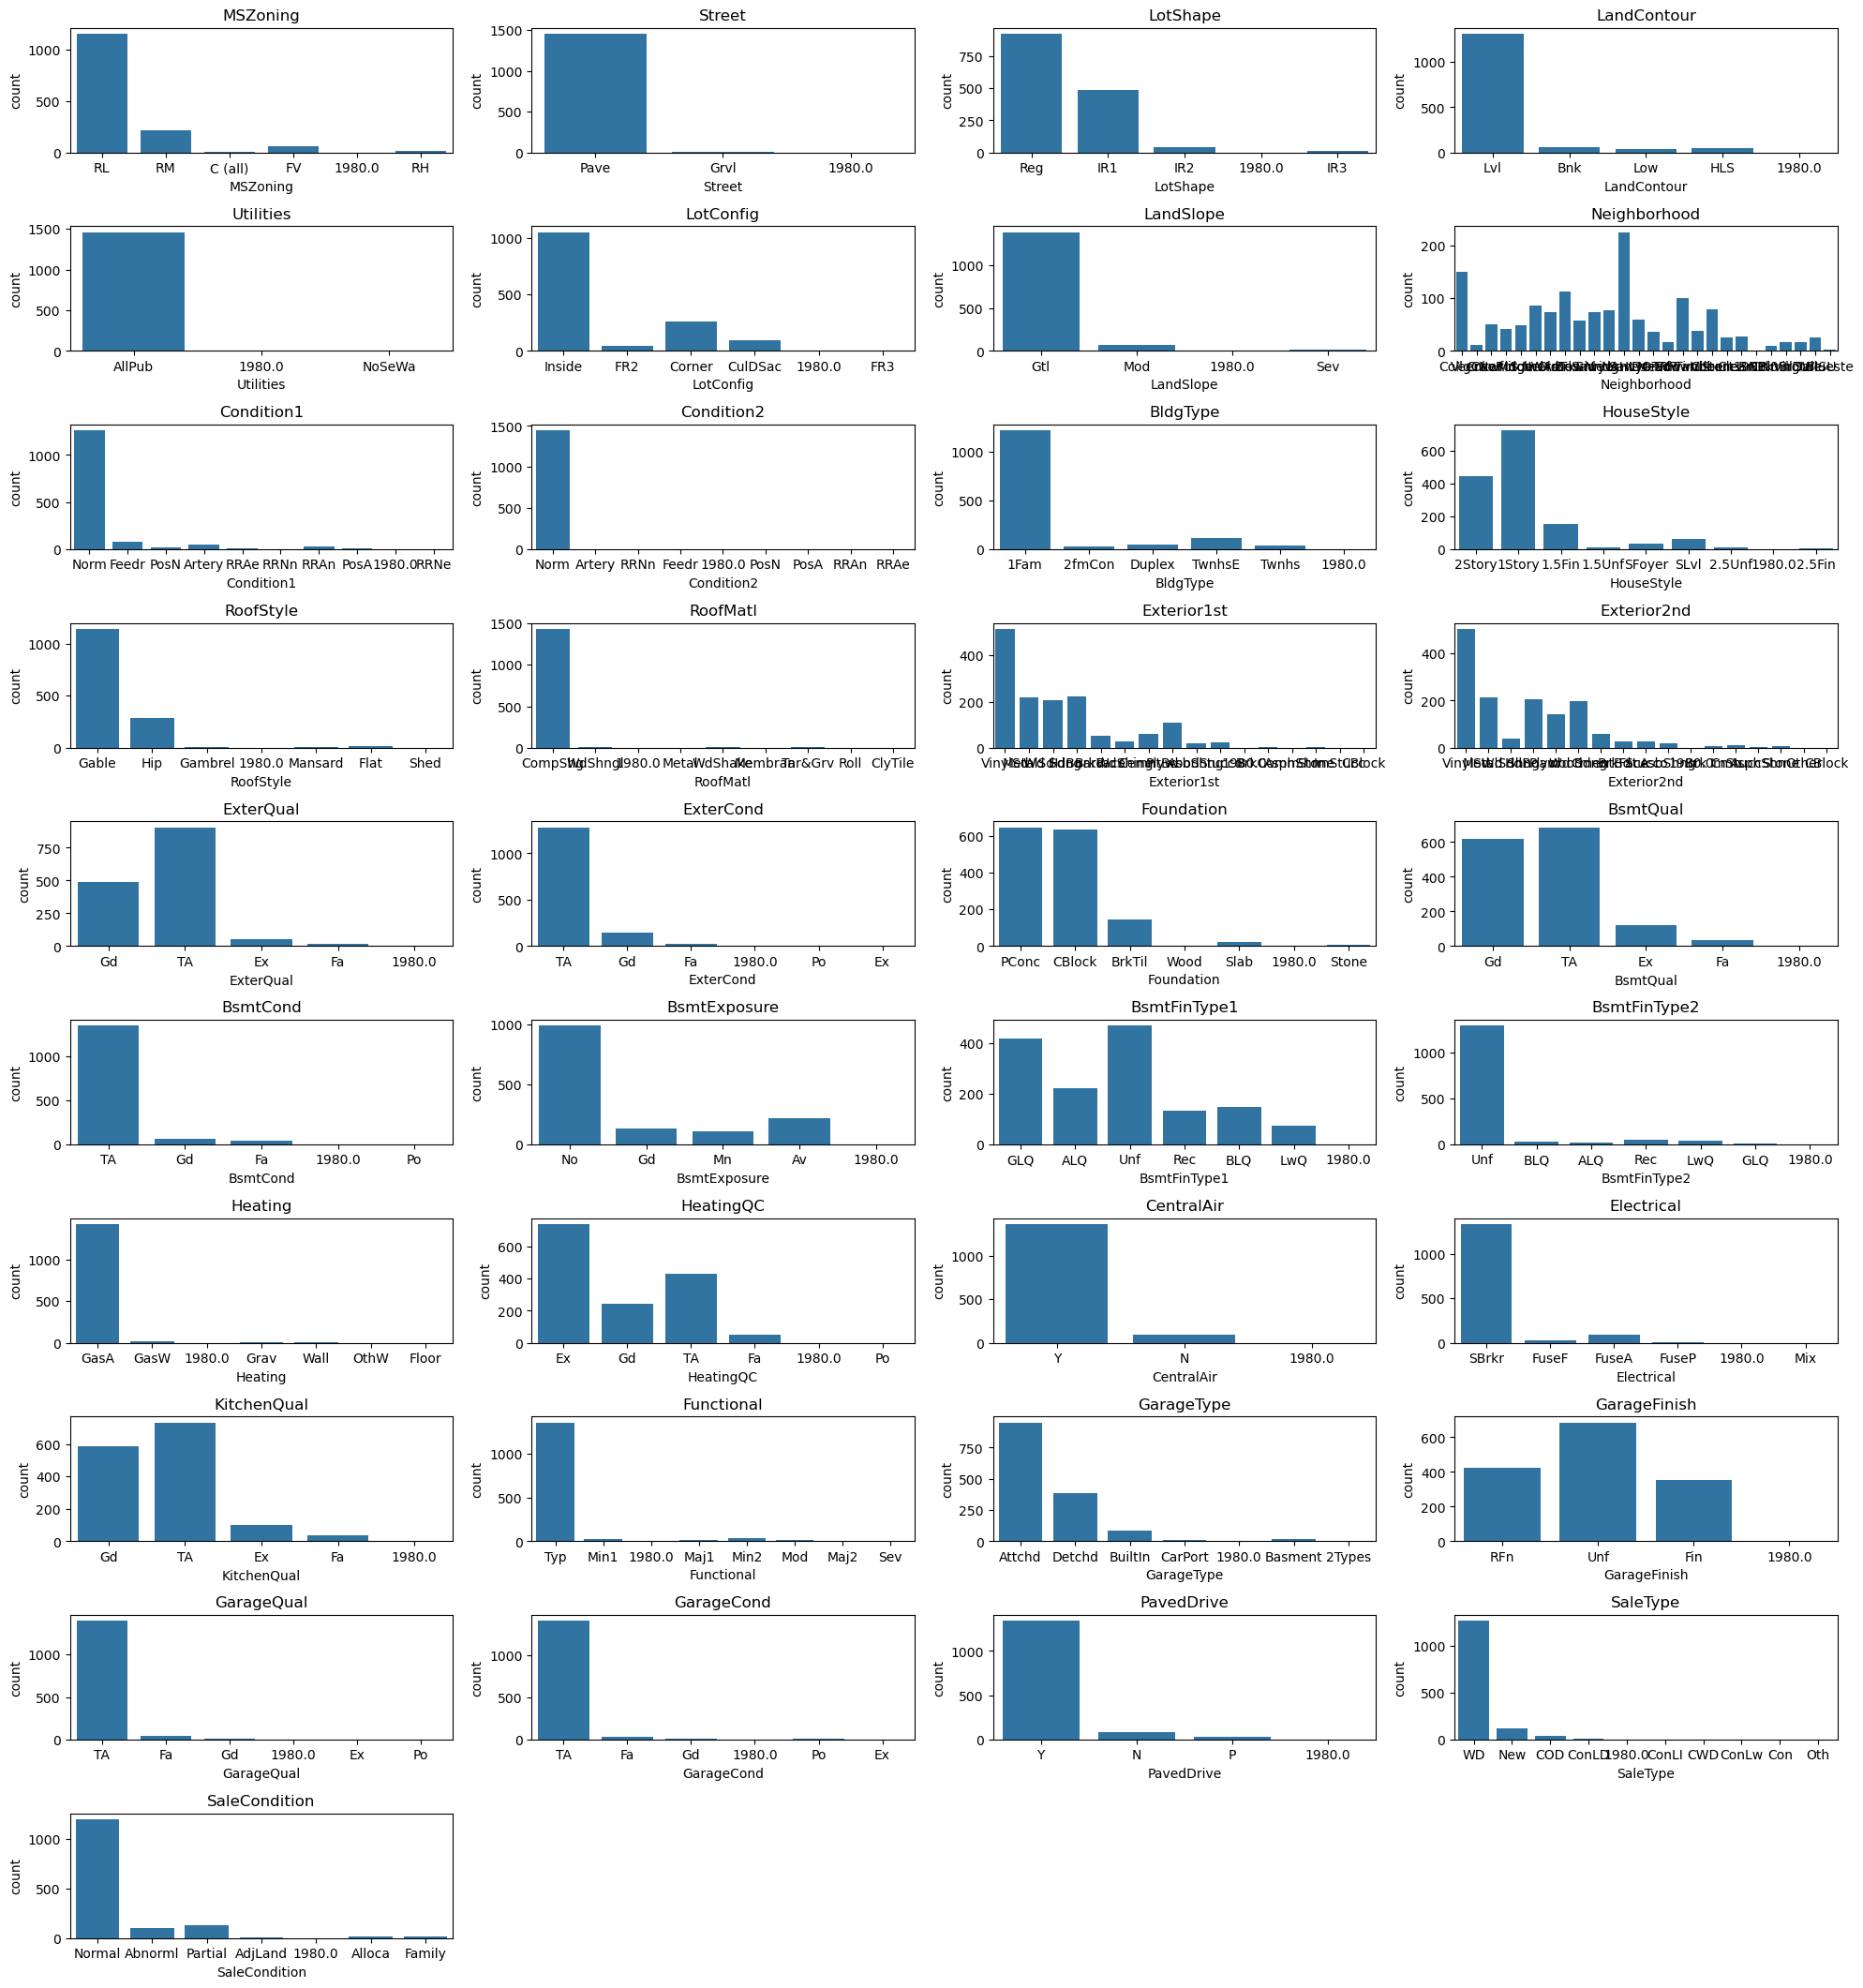

In [35]:
#count plot for categorical columns to know the distribution of features of all columns
plt.figure(figsize=(20,23),facecolor='white')
plotnum=1
for i in categorical_cols:
    plt.subplot(11,4,plotnum)
    sns.countplot(x=data[i])
    plt.title(i)
    plotnum+=1
plt.tight_layout()
plt.show()

In [36]:
categorical_data = data[categorical_cols]
categorical_data.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [37]:
# Importing libraries required for encoding
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from category_encoders import TargetEncoder
from sklearn.pipeline import Pipeline

In [40]:
ordinal_encode_cols = ['LotShape','LandContour','Utilities','LandSlope','ExterQual','ExterCond','BsmtQual','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtCond','HeatingQC','KitchenQual','Functional','GarageFinish','GarageQual','GarageCond','PavedDrive']
one_hot_encode_cols = ['MSZoning','Street','LotConfig','BldgType','HouseStyle','RoofStyle','Foundation','Heating','CentralAir','Electrical','GarageType','SaleCondition']
target_encode_cols=['Neighborhood','Condition1','Condition2','RoofMatl','Exterior1st','Exterior2nd','SaleType']
target = 'SalePrice'

In [41]:
data[ordinal_encode_cols+one_hot_encode_cols+target_encode_cols] = data[ordinal_encode_cols+one_hot_encode_cols+target_encode_cols].astype(str)

In [42]:
import category_encoders
print(f'category_encoders version: {category_encoders.__version__}')

category_encoders version: 2.6.4


In [43]:
# Target Encoding for target_encode_cols
for col in target_encode_cols:
    means = data.groupby(col)[target].mean()
    data[col]= data[col].map(means)

In [44]:
# By using column transformer ordinal encoding for ordinal columns and onehot encoding for nominal columns
transformer=[
    ("one_hot", OneHotEncoder(sparse_output=False, handle_unknown="ignore"),one_hot_encode_cols),
    ("ordinal", OrdinalEncoder(),ordinal_encode_cols)
]

column_transformer  = ColumnTransformer(transformer, remainder = "passthrough")

transformed_data = column_transformer.fit_transform(data)

one_hot_feature_names = column_transformer.named_transformers_["one_hot"].get_feature_names_out(one_hot_encode_cols)

new_column_names = list(one_hot_feature_names) + ordinal_encode_cols + list (
    data.drop(columns = one_hot_encode_cols + ordinal_encode_cols).columns)

transformed_data = pd.DataFrame(transformed_data, columns = new_column_names)

transformed_data.head()

,MSZoning_1980.0,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_1980.0,Street_Grvl,Street_Pave,LotConfig_1980.0,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,BldgType_1980.0,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1980.0,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_1980.0,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Foundation_1980.0,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_1980.0,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_1980.0,CentralAir_N,CentralAir_Y,Electrical_1980.0,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_1980.0,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,SaleCondition_1980.0,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LotShape,LandContour,Utilities,LandSlope,ExterQual,ExterCond,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtCond,HeatingQC,KitchenQual,Functional,GarageFinish,GarageQual,GarageCond,PavedDrive,LotArea,Neighborhood,Condition1,Condition2,YearBuilt,YearRemodAdd,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SalePrice
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,4.0,1.0,1.0,3.0,5.0,3.0,4.0,3.0,6.0,4.0,1.0,3.0,7.0,2.0,5.0,5.0,3.0,8450.0,197965.773333,184535.679110,181202.140582,2003.0,2003.0,179835.712491,213732.900971,214432.460317,196.0,706.0,0.0,150.0,856.0,856.0,854.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,8.0,0.0,2003.0,2.0,548.0,0.0,61.0,0.0,0.0,0.0,0.0,2.0,2008.0,173433.038705,208500.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,4.0,1.0,1.0,4.0,5.0,3.0,2.0,1.0,6.0,4.0,1.0,4.0,7.0,2.0,5.0,5.0,3.0,9600.0,238772.727273,142475.481481,181202.140582,1976.0,1976.0,179835.712491,149493.054795,149877.835681,0.0,978.0,0.0,284.0,1262.0,1262.0,0.0,1262.0,0.0,1.0,2.0,0.0,3.0,1.0,6.0,1.0,1976.0,2.0,460.0,298.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,173433.038705,181500.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,4.0,1.0,1.0,3.0,5.0,3.0,3.0,3.0,6.0,4.0,1.0,3.0,7.0,2.0,5.0,5.0,3.0,11250.0,197965.773333,184535.679110,181202.140582,2001.0,2002.0,179835.712491,213732.900971,214432.460317,162.0,486.0,0.0,434.0,920.0,920.0,866.0,1786.0,1.0,0.0,2.0,1.0,3.0,1.0,6.0,1.0,2001.0,2.0,608.0,0.0,42.0,0.0,0.0,0.0,0.0,9.0,2008.0,173433.038705,223500.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0

In [45]:
transformed_data.shape

(1460, 130)

In [46]:
data1=transformed_data.drop('SalePrice',axis=1)

## Scaling

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
# Using standard scaler for input volumns
scale=StandardScaler()
d1=scale.fit_transform(data1)

In [49]:
scaled_data=pd.DataFrame(d1,columns=data1.columns)

In [50]:
scaled_data.head()

,MSZoning_1980.0,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_1980.0,Street_Grvl,Street_Pave,LotConfig_1980.0,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,BldgType_1980.0,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1980.0,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_1980.0,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Foundation_1980.0,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_1980.0,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_1980.0,CentralAir_N,CentralAir_Y,Electrical_1980.0,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_1980.0,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,SaleCondition_1980.0,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LotShape,LandContour,Utilities,LandSlope,ExterQual,ExterCond,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtCond,HeatingQC,KitchenQual,Functional,GarageFinish,GarageQual,GarageCond,PavedDrive,LotArea,Neighborhood,Condition1,Condition2,YearBuilt,YearRemodAdd,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType
0,-0.02618,-0.078757,-0.215859,-0.105263,0.518133,-0.418955,-0.02618,-0.064238,0.069409,-0.02618,-0.467651,-0.262324,-0.182380,-0.052414,0.622762,-0.02618,0.443533,-0.144841,-0.192177,-0.1742,-0.291025,-0.343391,-0.098397,-0.02618,-0.994535,-0.074227,-0.083045,1.510265,-0.16125,-0.215859,-0.02618,-0.094785,0.528753,-0.087129,-0.492497,-0.069409,-0.037037,-0.02618,-0.332063,-0.876102,1.120968,-0.129279,-0.064238,-0.045376,-0.02618,-0.02618,0.149696,-0.10854,-0.069409,-0.037037,-0.052414,-0.02618,-0.262324,0.263813,-0.02618,-0.262324,-0.137265,-0.045376,-0.02618,0.307332,-0.02618,-0.064238,0.731591,-0.114827,-0.253259,-0.078757,-0.599503,-0.02618,-0.272616,-0.052414,-0.091035,-0.117851,0.468739,-0.305995,0.751699,0.315487,0.0,-0.222117,-0.767336,0.363731,-0.319487,0.628941,-0.427496,0.307772,0.280599,-0.883856,-0.403923,0.256739,-0.278723,0.216487,0.186892,0.290619,-0.309260,0.291250,0.245381,0.040423,1.050860,0.879371,-0.067096,1.048835,1.067522,0.597557,0.626335,-0.273374,-0.954643,-0.476479,-0.823987,1.187015,0.411192,-0.015049,-0.027225,-0.017771,-0.014269,-0.022918,-0.026167,0.004734,-0.037877,1.019068,0.325876,0.382398,-0.768412,0.287882,-0.361899,-0.267294,0.0,-0.152899,-0.109668,0.133922,-0.248349
1,-0.02618,-0.078757,-0.215859,-0.105263,0.518133,-0.418955,-0.02618,-0.064238,0.069409,-0.02618,-0.467651,-0.262324,5.483049,-0.052414,-1.605749,-0.02618,0.443533,-0.144841,-0.192177,-0.1742,-0.291025,-0.343391,-0.098397,-0.02618,1.005495,-0.074227,-0.083045,-0.662136,-0.16125,-0.215859,-0.02618,-0.094785,0.528753,-0.087129,-0.492497,-0.069409,-0.037037,-0.02618,-0.332063,1.141420,-0.892086,-0.129279,-0.064238,-0.045376,-0.02618,-0.02618,0.149696,-0.10854,-0.069409,-0.037037,-0.052414,-0.02618,-0.262324,0.263813,-0.02618,-0.262324,-0.137265,-0.045376,-0.02618,0.307332,-0.02618,-0.064238,0.731591,-0.114827,-0.253259,-0.078757,-0.599503,-0.02618,-0.272616,-0.052414,-0.091035,-0.117851,0.468739,-0.305995,0.751699,0.315487,0.0,-0.222117,0.661632,0.363731,-0.319487,-1.123451,-1.514854,0.307772,0.280599,-0.883856,0.794710,0.256739,-0.278723,0.216487,0.186892,0.290619,-0.057272,0.984863,-2.540378,0.040423,0.155361,-0.429031,-0.067096,-0.998970,-0.98337

In [51]:
dataf=pd.concat([scaled_data,data.SalePrice],axis=1)

In [52]:
dataf.head()

,MSZoning_1980.0,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_1980.0,Street_Grvl,Street_Pave,LotConfig_1980.0,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,BldgType_1980.0,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1980.0,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_1980.0,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Foundation_1980.0,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_1980.0,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_1980.0,CentralAir_N,CentralAir_Y,Electrical_1980.0,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_1980.0,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,SaleCondition_1980.0,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LotShape,LandContour,Utilities,LandSlope,ExterQual,ExterCond,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtCond,HeatingQC,KitchenQual,Functional,GarageFinish,GarageQual,GarageCond,PavedDrive,LotArea,Neighborhood,Condition1,Condition2,YearBuilt,YearRemodAdd,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SalePrice
0,-0.02618,-0.078757,-0.215859,-0.105263,0.518133,-0.418955,-0.02618,-0.064238,0.069409,-0.02618,-0.467651,-0.262324,-0.182380,-0.052414,0.622762,-0.02618,0.443533,-0.144841,-0.192177,-0.1742,-0.291025,-0.343391,-0.098397,-0.02618,-0.994535,-0.074227,-0.083045,1.510265,-0.16125,-0.215859,-0.02618,-0.094785,0.528753,-0.087129,-0.492497,-0.069409,-0.037037,-0.02618,-0.332063,-0.876102,1.120968,-0.129279,-0.064238,-0.045376,-0.02618,-0.02618,0.149696,-0.10854,-0.069409,-0.037037,-0.052414,-0.02618,-0.262324,0.263813,-0.02618,-0.262324,-0.137265,-0.045376,-0.02618,0.307332,-0.02618,-0.064238,0.731591,-0.114827,-0.253259,-0.078757,-0.599503,-0.02618,-0.272616,-0.052414,-0.091035,-0.117851,0.468739,-0.305995,0.751699,0.315487,0.0,-0.222117,-0.767336,0.363731,-0.319487,0.628941,-0.427496,0.307772,0.280599,-0.883856,-0.403923,0.256739,-0.278723,0.216487,0.186892,0.290619,-0.309260,0.291250,0.245381,0.040423,1.050860,0.879371,-0.067096,1.048835,1.067522,0.597557,0.626335,-0.273374,-0.954643,-0.476479,-0.823987,1.187015,0.411192,-0.015049,-0.027225,-0.017771,-0.014269,-0.022918,-0.026167,0.004734,-0.037877,1.019068,0.325876,0.382398,-0.768412,0.287882,-0.361899,-0.267294,0.0,-0.152899,-0.109668,0.133922,-0.248349,208500
1,-0.02618,-0.078757,-0.215859,-0.105263,0.518133,-0.418955,-0.02618,-0.064238,0.069409,-0.02618,-0.467651,-0.262324,5.483049,-0.052414,-1.605749,-0.02618,0.443533,-0.144841,-0.192177,-0.1742,-0.291025,-0.343391,-0.098397,-0.02618,1.005495,-0.074227,-0.083045,-0.662136,-0.16125,-0.215859,-0.02618,-0.094785,0.528753,-0.087129,-0.492497,-0.069409,-0.037037,-0.02618,-0.332063,1.141420,-0.892086,-0.129279,-0.064238,-0.045376,-0.02618,-0.02618,0.149696,-0.10854,-0.069409,-0.037037,-0.052414,-0.02618,-0.262324,0.263813,-0.02618,-0.262324,-0.137265,-0.045376,-0.02618,0.307332,-0.02618,-0.064238,0.731591,-0.114827,-0.253259,-0.078757,-0.599503,-0.02618,-0.272616,-0.052414,-0.091035,-0.117851,0.468739,-0.305995,0.751699,0.315487,0.0,-0.222117,0.661632,0.363731,-0.319487,-1.123451,-1.514854,0.307772,0.280599,-0.883856,0.794710,0.256739,-0.278723,0.216487,0.186892,0.290619,-0.057272,0.984863,-2.540378,0.040423,0.155361,-0.429031,-0.067096,-

In [53]:
dataf.shape

(1460, 130)

In [54]:
dataf.SalePrice.isnull().sum()

0

In [55]:
x = dataf.drop('SalePrice',axis=1)
y = dataf['SalePrice']

# Model Creation

In [56]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

## Linear Regression

In [57]:
# Linear Regression for final dataframe
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [58]:
y_predict= model.predict(x_test)

### Evaliuation Metrics

In [59]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [60]:
mean_absolute_error(y_test,y_predict)

21147.593486141923

In [61]:
mean_squared_error(y_test,y_predict)

1313571059.403849

In [62]:
r2_score(y_test,y_predict)

0.8287463891466536

# Random Forest Regressor

In [72]:
from sklearn.ensemble import RandomForestRegressor

In [73]:
rf_model= RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [74]:
y_pred = rf_model.predict(x_test)

In [75]:
r2_score(y_test,y_pred)

0.885696657618863

In [76]:
mean_squared_error(y_test,y_pred)

876743922.6351184

In [77]:
feature_importances = rf_model.feature_importances_

In [78]:
max_importance = np.max(feature_importances)

In [79]:
# calculating feature importance of all columns
np.random.seed(42)
num_features=130
original_columns =dataf.columns.tolist()
feature_importances = np.random.rand(num_features)

feature_importance_df = pd.DataFrame({
    'Original Feature' : original_columns,
    'Importance': feature_importances})
top_features = feature_importance_df.sort_values(by='Importance', ascending=False)

print(top_features)

          Original Feature  Importance
69   SaleCondition_AdjLand    0.986887
11       LotConfig_CulDSac    0.969910
50            Heating_Wall    0.969585
34           RoofStyle_Hip    0.965632
1         MSZoning_C (all)    0.950714
33       RoofStyle_Gambrel    0.948886
52            CentralAir_N    0.939499
112               HalfBath    0.929698
55        Electrical_FuseA    0.921874
43         Foundation_Wood    0.909320
104              BsmtUnfSF    0.907566
121            OpenPorchSF    0.896091
53            CentralAir_Y    0.894827
118             GarageCars    0.892559
88            GarageFinish    0.887213
115           TotRmsAbvGrd    0.871461
7              Street_Grvl    0.866176
80                BsmtQual    0.863103
127                 YrSold    0.860731
12           LotConfig_FR2    0.832443
62       GarageType_Attchd    0.828738
126                 MoSold    0.818015
73   SaleCondition_Partial    0.815461
35       RoofStyle_Mansard    0.808397
113           BedroomAbvG

In [80]:
data.columns

Index(['MSZoning', 'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       

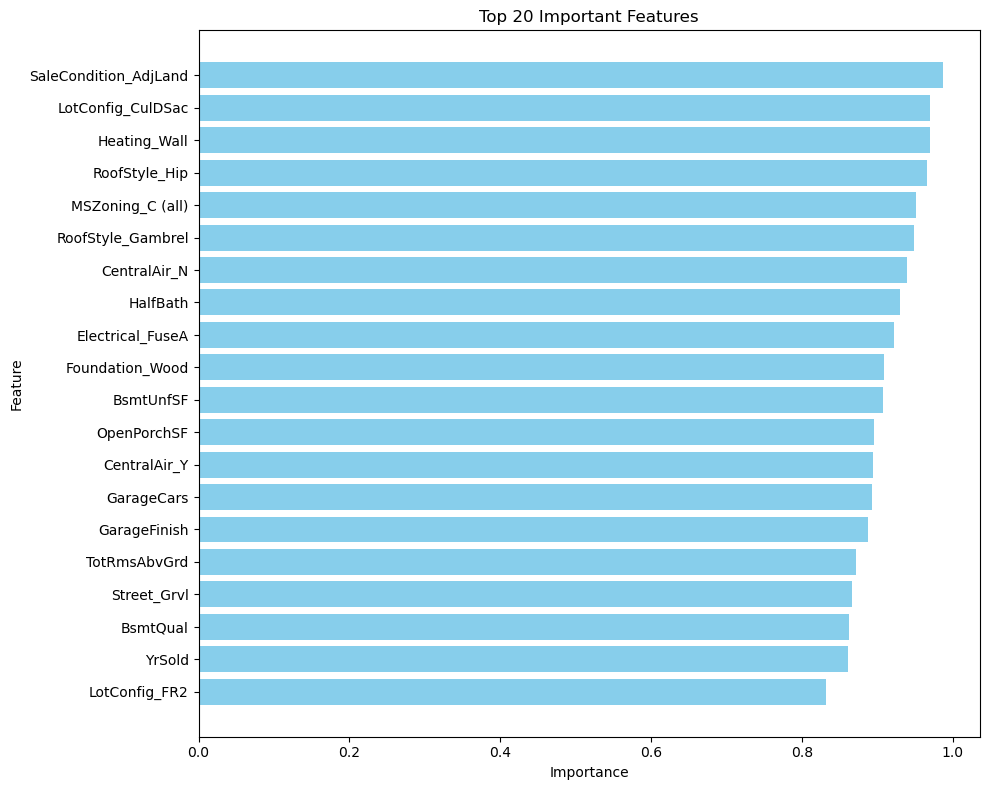

In [81]:
# Feature importance plot for top 20 features
top_20_features = top_features.head(20)

plt.figure(figsize=(10, 8))
plt.barh(top_20_features['Original Feature'], top_20_features['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # To display the highest importance feature at the top
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 20 Important Features')
plt.tight_layout()
plt.show()

## Hyperparameter Tuning for Random Forest

In [82]:
from sklearn.model_selection import GridSearchCV

In [83]:
# Hyperparameter tuning for random forest fitting 5 models of 324 candidates 
param_grid_rf = {
    'n_estimators': [100,200,300],
    'max_depth': [10,20,30,None],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,2,4],
    'max_features':['auto', 'sqrt', 'log2']
}
rf = RandomForestRegressor(random_state=42)

grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='r2', verbose=2, n_jobs=-1)
grid_search_rf.fit(x_train,y_train)

print("Best Parameters:", grid_search_rf.best_params_)
best_rf = grid_search_rf.best_estimator_
r2_best_rf = best_rf.score(x_test,y_test)
print(f"R2 after tuning: {r2_best_rf}")

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
R2 after tuning: 0.8646495728382196


In [84]:
rf_hp =RandomForestRegressor(n_estimators=200, max_depth=20, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, random_state=42)
rf_hp.fit(x_train,y_train)

RandomForestRegressor(max_depth=20, max_features='sqrt', n_estimators=200,
                      random_state=42)

In [85]:
hy_pred = rf_hp.predict(x_test)

In [86]:
# r2 score for tuned random forest model
r2_score(y_test,hy_pred)

0.8646495728382196

# Gradient Boost

In [87]:
# Gradient Boost model for final data
from sklearn.ensemble  import GradientBoostingRegressor

In [88]:
gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr_model.fit(x_train,y_train)

GradientBoostingRegressor(random_state=42)

In [89]:
y_pre=gbr_model.predict(x_test)

In [90]:
r2_score(y_test,y_pre)

0.8908402086103062

In [91]:
dataf.to_csv('preprocessed_data.csv', index=False)

## Hyperparameter Tuning for gradient Boost

In [92]:
# hyperparameter tuning for gradient boost model
param_grid_gbr = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5]
}

gbr = GradientBoostingRegressor(random_state=42)

# GridSearchCV
grid_search_gbr = GridSearchCV(estimator=gbr, param_grid=param_grid_gbr, cv=5, scoring='r2', verbose=2, n_jobs=-1)
grid_search_gbr.fit(x_train, y_train)

# Best Parameters and Score
print("Best Parameters for Gradient Boosting:", grid_search_gbr.best_params_)
best_gbr = grid_search_gbr.best_estimator_
r2_gbr = best_gbr.score(x_test, y_test)
print(f"Best R² for Gradient Boosting after tuning: {r2_gbr}")


Fitting 5 folds for each of 486 candidates, totalling 2430 fits
Best Parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300, 'subsample': 1.0}
Best R² for Gradient Boosting after tuning: 0.8936324627322731


In [102]:
hgbr_model = GradientBoostingRegressor(n_estimators=300, learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=10, subsample=1.0, random_state=42)
hgbr_model.fit(x_train,y_train)

GradientBoostingRegressor(min_samples_split=10, n_estimators=300,
                          random_state=42)

In [103]:
hy_pre=hgbr_model.predict(x_test)

In [104]:
# r2 score after tuning gradient boost model
r2_score(y_test,hy_pre)

0.8936324627322731

# Recommendor System

In [105]:
# recommendor system for for selected features 
features = ['SalePrice', 'TotalBsmtSF', 'BedroomAbvGr', 'LotShape', 'LotArea', 'YearBuilt']
filtered_data = dataf[features].copy()

In [106]:
def recommend_houses(model, data, min_price=None, max_price=None, min_bedrooms=None, max_year_built=None, min_lot_area=None):
    
    # Verify the input is a DataFrame
    if not isinstance(data, pd.DataFrame):
        raise ValueError("The 'data' parameter must be a pandas DataFrame.")
    
    # Filter based on user preferences
    filtered_data = data.copy()
    
    if min_price is not None:
        filtered_data = filtered_data[filtered_data['SalePrice'] >= min_price]
    if max_price is not None:
        filtered_data = filtered_data[filtered_data['SalePrice'] <= max_price]
    if min_bedrooms is not None:
        filtered_data = filtered_data[filtered_data['BedroomAbvGr'] >= min_bedrooms]
    if max_year_built is not None:
        filtered_data = filtered_data[filtered_data['YearBuilt'] <= max_year_built]
    if min_lot_area is not None:
        filtered_data = filtered_data[filtered_data['LotArea'] >= min_lot_area]
    
    if filtered_data.empty:
        return pd.DataFrame({'Message': ['No houses match the given criteria.']})
    
    # Drop target column (SalePrice) for prediction
    features_to_predict = filtered_data.drop(columns=['SalePrice'])
    
    # Predict house prices using the trained model
    filtered_data['PredictedPrice'] = model.predict(features_to_predict)
    
    # Sort by predicted price
    recommendations = filtered_data.sort_values(by='PredictedPrice', ascending=True).reset_index(drop=True)
    
    return recommendations


In [109]:
# Step 1: Generate recommendations
recommendations = recommend_houses(
    model=hgbr_model,         # Trained Gradient Boosting model
    data=transformed_data,    # Use the scaled and encoded dataframe for predictions
    min_price=200000,         # Example filter criteria
    max_price=300000,
    min_bedrooms=3,
    max_year_built=1980,
    min_lot_area=10000
)

# Step 2: Check if recommendations exist
if 'Message' in recommendations.columns:
    print(recommendations.iloc[0, 0])  # Print message if no houses match
else:
    # Extract the recommended SalePrice values
    recommended_prices = recommendations['SalePrice'].tolist()

    # Step 3: Match rows in the original dataset `data`
    matching_rows = data[data['SalePrice'].isin(recommended_prices)]

    # Step 4: Get only the first 10 rows of matching results
    top_10_matches = matching_rows.head(10)

    # Display all columns for the top 10 matches
    print(top_10_matches)


   MSZoning  LotArea Street LotShape LandContour Utilities LotConfig  \
2        RL  11250.0   Pave      IR1         Lvl    AllPub    Inside   
4        RL  14260.0   Pave      IR1         Lvl    AllPub       FR2   
7        RL  10382.0   Pave      IR1         Lvl    AllPub    Corner   
22       RL   9742.0   Pave      Reg         Lvl    AllPub    Inside   
28       RL  16321.0   Pave      IR1         Lvl    AllPub   CulDSac   
64       RL   9375.0   Pave      Reg         Lvl    AllPub    Inside   
67       RL  10665.0   Pave      IR1         Lvl    AllPub    Inside   
69       RL  15593.0   Pave      Reg         Lvl    AllPub    Corner   
70       RL  13651.0   Pave      IR1         Lvl    AllPub    Inside   
85       RL  16059.0   Pave      Reg         Lvl    AllPub    Corner   

   LandSlope   Neighborhood     Condition1     Condition2 BldgType HouseStyle  \
2        Gtl  197965.773333  184535.679110  181202.140582     1Fam     2Story   
4        Gtl  335295.317073  184535.679110  1